# Project Plan
Inferring market sentiments using text data has not been gaining much popularity until a most recent event of a price surge on GME (GameStop) stock in late January 2021. Prior to the price surge, investors from the social media site Reddit had discovered that many institutional investors are betting against GameStop by taking a short position on its stocks. This discovery then led to a mass-buying of GME stocks by Reddit users, causing a fourteen-fold price increase.

Therefore, in this project, we aim to use financial corpora to generate insights into trading decisions of four popular meme stocks, GameStop (GME), American Multi-Cinema (AMC), Bitcoin (BTC), and Ethereum (ETH). The problems listed below serve as a starting point for this project.

1. What are the most popular subreddits overall? Are finance or stock related subreddit included in the top subreddits? How do reddit users care about the stock market?

Technical proposal: Subreddit popularity is defined by number of submissions. Perform counts of submissions by subreddit, and slice the top N (i.e. 10) subreddits. Simply a barplot will present us with the submissions count of the top N subreddits. Moreover, it also allows us to perceive the popularity gap between different subreddits. The x-axis, which displays the top N subreddits, makes it possible to check whether finance-related subreddits are included or not.

2. Where do the heated discussions of investments happen, i.e. particular subreddits?

Technical proposal: Use NLP to subset data by identifying posts that contain four meme stocks. If we want to look at more general investing subreddits, we could also adopt the subreddit list by Google and use the list to filter the data. Either way will work. Similar to question 1, popularity of investing subreddits can be illustrated by a barplot. But the number of both submissions and comments will be considered, since comments are also means of communication and engagement of ideas.

3. Among the 4 meme stocks, what is the most popular stock?

Technical proposal: Use NLP to create 4 dummy variables indicating whether posts mention each meme stock name. Conduct counts of submissions and comments by the meme stock dummies, and analyze post counts of each meme stock by a barplot that displays the counts and differences between different stocks. Another way is to sum up the number of submissions and comments to make an overall visualization.

4. How does the number of discussions of the stocks related to the returns? 

Technical proposal: Here comes the external data. First of all, we will pull the open and close price of these four meme stocks from yahoo finance, with respect to the time frame covered by the reddit dataset. Then use the stock open and close price to calculate stock returns of each individual stock, and use date to merge with the main reddit dataset. In terms of association, in this stage, a correlation analysis seems sufficient. Perform counts of posts over each day and run a correlation analysis between number of posts and stock returns will address this problem of how the number of posts related to stock returns.

5. Does popularity change? If so, how does the number of discussions of the meme stocks change over time? Do they gain increasing attention at a specific time period?

Technical proposal: The key point is to show the trend of number of posts regarding each meme stock over time by a line plot. Based on the meme stock dummies created for previous questions, we are able to count the number of posts by each stock by a specific time period. Ideally, the count should be monthly or quarterly, in order to better capture the changes over time. Stacking the line plot of all the four meme stocks will allow us to check the trend of each meme stock and compare different stocks at the same time.

6. In terms of sentiment, how do users’ attitudes towards these 4 meme stocks change over time, i.e. by month?

Technical proposal: First use NLP to get the sentiment of the corpus of the meme stocks. To get the overall sentiment of the corpus for each stock, we could perform a weighted average of the sentiment score, either within a day or a 3 day span, especially considering the delayed effect of market sentiment on the stocks. Then conduct a time series plot of the sentiment score, which shows the trend of sentiment over time. To obtain more significant trends, we can also aggregate the sentiment score by month or quarter and take the average sentiment scores.

7. How is the sentiment of reddit associated with the stock returns? 

Technical proposal: Retain the sentiment score of posts in the previous question. Run correlation analysis on sentiment score and stock returns. Alternatively, we could also run a simple regression to test the significance of sentiment score on stock returns. This can be done separately for each meme stock or treating all meme stocks as a whole.

8. To be more specific, with some other variables, can we actually predict the stock returns using reddit sentiment for speculation?

Technical proposal: This is a classification problem, where we need to combine sentiment scores obtained in the previous question and create some variables as well. Some variables can be generated based on the data, for example, the number of posts that mention the specific stock. Other variables that contribute to stock returns could also come from outside sources. For example, momentum (MOM), relative strength index (RSI), normalized average true range (NATR), commodity channel index (CCI).

9. What are  the commonly used words in the discussions of meme stocks?

Technical proposal: To truncate the data for collect purpose, we will focus on posts of each meme stock with the highest scores or top number of comments. Then some basic text cleaning and processing will be conducted. After subsetting and cleaning the corpus for each meme stock, word cloud of the posts will display the most commonly used words in the discussions of these stocks.

10. Covid-19 striked the world in 2020. Does it also have an effect on the reddit discussion of meme stocks?

Technical proposal: To generally assert the shock of covid-19 on reddit posts, we could rely on the time series plot to check whether there is a surge or drop of number of posts at a certain time where there is a surge of covid-19 cases. To be more specific, we could also pull the daily covid-19 cases data to merge with the aggregated post counts data to either run a correlation analysis or plot the number of posts and covid-19 cases over time in the same graph.

11. Does some news also affect the stock market as well?

Technical proposal: Parallel to the investing-related post, count number of submissions in news-related subreddits by the same time period with investing data. Similarly, to subset news-related subreddits, we could turn to google to get the top news subreddits and use the list of subreddits to filter the dataset.

In [0]:
dbutils.fs.ls("abfss://anly502@marckvaismanblob.dfs.core.windows.net/reddit/parquet/comments")

Out[1]: [FileInfo(path='abfss://anly502@marckvaismanblob.dfs.core.windows.net/reddit/parquet/comments/_SUCCESS', name='_SUCCESS', size=0, modificationTime=1666559692000),
 FileInfo(path='abfss://anly502@marckvaismanblob.dfs.core.windows.net/reddit/parquet/comments/_committed_6430546272860639810', name='_committed_6430546272860639810', size=4681232, modificationTime=1666559692000),
 FileInfo(path='abfss://anly502@marckvaismanblob.dfs.core.windows.net/reddit/parquet/comments/_started_6430546272860639810', name='_started_6430546272860639810', size=0, modificationTime=1666559125000),
 FileInfo(path='abfss://anly502@marckvaismanblob.dfs.core.windows.net/reddit/parquet/comments/part-00000-tid-6430546272860639810-74fcef5e-1966-48e8-bd31-ca9976a93c8f-3-1-c000.snappy.parquet', name='part-00000-tid-6430546272860639810-74fcef5e-1966-48e8-bd31-ca9976a93c8f-3-1-c000.snappy.parquet', size=18145455, modificationTime=1666557337000),
 FileInfo(path='abfss://anly502@marckvaismanblob.dfs.core.windows.net

In [0]:
from pyspark.sql.functions import *

In [0]:
comments = spark.read.parquet("abfss://anly502@marckvaismanblob.dfs.core.windows.net/reddit/parquet/comments")
submissions = spark.read.parquet("abfss://anly502@marckvaismanblob.dfs.core.windows.net/reddit/parquet/submissions")

# 1. Basic Dataset Info

### a) Comments

In [0]:
# comments data shape
comments_row_count = comments.count()
comment_col_count = len(comments.columns)
print(f"shape of the comments dataframe is {comments_row_count:,}x{comment_col_count}")

shape of the comments dataframe is 4,473,556,762x21


In [0]:
comments.printSchema()

root
 |-- author: string (nullable = true)
 |-- author_cakeday: boolean (nullable = true)
 |-- author_flair_css_class: string (nullable = true)
 |-- author_flair_text: string (nullable = true)
 |-- body: string (nullable = true)
 |-- can_gild: boolean (nullable = true)
 |-- controversiality: long (nullable = true)
 |-- created_utc: long (nullable = true)
 |-- distinguished: string (nullable = true)
 |-- edited: string (nullable = true)
 |-- gilded: long (nullable = true)
 |-- id: string (nullable = true)
 |-- is_submitter: boolean (nullable = true)
 |-- link_id: string (nullable = true)
 |-- parent_id: string (nullable = true)
 |-- permalink: string (nullable = true)
 |-- retrieved_on: long (nullable = true)
 |-- score: long (nullable = true)
 |-- stickied: boolean (nullable = true)
 |-- subreddit: string (nullable = true)
 |-- subreddit_id: string (nullable = true)



In [0]:
# cast boolean to int
# c_bool = ['author_cakeday', 'can_gild','is_submitter','stickied']
# for c in c_bool:
#     comments = comments.withColumn(c, col(c).cast('int'))

In [0]:
# missing values of key column
c_col = ['subreddit','body','score','gilded']
comments.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in c_col]
   ).show()

+---------+----+-----+------+
|subreddit|body|score|gilded|
+---------+----+-----+------+
|        1| 895|    0|     0|
+---------+----+-----+------+



### b) Submissions

In [0]:
# submission data shape
sub_row_count = submissions.count()
sub_col_count = len(submissions.columns)
print(f"shape of the submissions dataframe is {sub_row_count:,}x{sub_col_count}")

shape of the submissions dataframe is 643,255,528x68


In [0]:
submissions.printSchema()

root
 |-- adserver_click_url: string (nullable = true)
 |-- adserver_imp_pixel: string (nullable = true)
 |-- archived: boolean (nullable = true)
 |-- author: string (nullable = true)
 |-- author_cakeday: boolean (nullable = true)
 |-- author_flair_css_class: string (nullable = true)
 |-- author_flair_text: string (nullable = true)
 |-- author_id: string (nullable = true)
 |-- brand_safe: boolean (nullable = true)
 |-- contest_mode: boolean (nullable = true)
 |-- created_utc: long (nullable = true)
 |-- crosspost_parent: string (nullable = true)
 |-- crosspost_parent_list: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- approved_at_utc: string (nullable = true)
 |    |    |-- approved_by: string (nullable = true)
 |    |    |-- archived: boolean (nullable = true)
 |    |    |-- author: string (nullable = true)
 |    |    |-- author_flair_css_class: string (nullable = true)
 |    |    |-- author_flair_text: string (nullable = true)
 |    |    |-- b

In [0]:
# missing values of key column
s_col = ['subreddit','selftext','num_comments','created_utc','score']
submissions.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in s_col]
   ).show()

+---------+--------+------------+-----------+-----+
|subreddit|selftext|num_comments|created_utc|score|
+---------+--------+------------+-----------+-----+
|        8|      25|           0|          0|    0|
+---------+--------+------------+-----------+-----+



In [0]:
# clean text of submissions -> remove [deleted],['removed'], empty & meaningless posts
# sub_clean = submissions.filter((submissions.selftext != '') & 
#                                (submissions.selftext != '[deleted]') & 
#                                (submissions.selftext != '[removed]') & 
#                                (submissions.selftext != ' ') & 
#                                (submissions.selftext != '.'))

In [0]:
# clean text of comments -> remove [deleted],['removed'], empty & meaningless posts
# comm_clean = comments.filter((comments.body != '') & 
#                                (comments.body != '[deleted]') & 
#                                (comments.body != '[removed]') & 
#                                (comments.body != ' ') & 
#                                (comments.body != '.'))

# 2. Exploratory Data Analysis
In this section, we will propose answers to some of our business problems by graphs and summary tables.

In [0]:
# import vis packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [0]:
## create a directory called data/plots and data/csv to save generated data
import os
PLOT_DIR = os.path.join("data", "plots")
CSV_DIR = os.path.join("data", "csv")
os.makedirs(PLOT_DIR, exist_ok=True)
os.makedirs(CSV_DIR, exist_ok=True)

### What are the most popular subreddits overall? Are finance or stock related subreddit included?

In [0]:
# Total subreddits
subreddit_counts = submissions.groupBy("subreddit").count().orderBy(col("count"), ascending=False).collect()

In [0]:
print('Number of subreddits:', len(subreddit_counts))

Number of subreddits: 6345277


In [0]:
# top 10 subreddits w/ most submissions
top_n = 10
top_n_subreddits = spark.createDataFrame(subreddit_counts[:top_n]).toPandas()
top_n_subreddits

,subreddit,count
0,AskReddit,6579206
1,FreeKarma4U,4523825
2,GaySnapchat,3304753
3,dirtykikpals,3247581
4,memes,2769676
5,teenagers,2505293
6,dirtyr4r,2192238
7,onlyfansgirls101,1888834
8,jerkbudss,1859288
9,AutoNewspaper,1733587


In [0]:
# top 10 subreddits w/ most comments
top_n_subrdt_comm = spark.createDataFrame(submissions.groupBy("subreddit").agg(sum("num_comments").alias('num_comments')).orderBy('num_comments', ascending=False).collect()[:top_n]).toPandas()
top_n_subrdt_comm

,subreddit,num_comments
0,AskReddit,122207482
1,wallstreetbets,60240209
2,AmItheAsshole,56035695
3,teenagers,38820799
4,FreeKarma4U,35839326
5,memes,32676424
6,politics,30398313
7,CryptoCurrency,28971559
8,Superstonk,28658546
9,nba,21882597


In [0]:
# over18 submissions over the 10 most popular subreddits
top_n_subreddit_over18 = submissions.filter(col('subreddit').isin(top_n_subreddits.subreddit.tolist())).groupBy("subreddit","over_18").count().orderBy('subreddit').toPandas()
top_n_subreddit_over18

,subreddit,over_18,count
0,AskReddit,False,6236127
1,AskReddit,True,343079
2,AutoNewspaper,False,1733569
3,AutoNewspaper,True,18
4,FreeKarma4U,True,2118687
5,FreeKarma4U,False,2405138
6,GaySnapchat,True,3304753
7,dirtykikpals,True,3247581
8,dirtyr4r,True,2192238
9,jerkbudss,True,1859288


In [0]:
# num_comments
top_n_subreddit_comm= submissions.filter(col('subreddit').isin(top_n_subreddits.subreddit.tolist())).groupBy("subreddit").agg(sum("num_comments").alias('num_comments')).orderBy(col("num_comments"), ascending=False).toPandas()
top_n_subreddit_comm

,subreddit,num_comments
0,AskReddit,122207482
1,teenagers,38820799
2,FreeKarma4U,35839326
3,memes,32676424
4,onlyfansgirls101,5407333
5,GaySnapchat,4080296
6,jerkbudss,2769288
7,dirtyr4r,1841083
8,dirtykikpals,201394
9,AutoNewspaper,27092


In [0]:
# distinguish
# covert string to dummy variable
submissions = submissions.withColumn("distinguish_dummy", submissions.distinguished.isNotNull())
# distinguished submissions across top subreddits 
top_n_subreddit_dist = submissions.filter(col('subreddit').isin(top_n_subreddits.subreddit.tolist())).groupBy("subreddit","distinguish_dummy").count().orderBy('subreddit').toPandas()
top_n_subreddit_dist

,subreddit,distinguish_dummy,count
0,AskReddit,False,6579193
1,AskReddit,True,13
2,AutoNewspaper,False,1733580
3,AutoNewspaper,True,7
4,FreeKarma4U,False,4523825
5,GaySnapchat,False,3304711
6,GaySnapchat,True,42
7,dirtykikpals,False,3247581
8,dirtyr4r,False,2192206
9,dirtyr4r,True,32


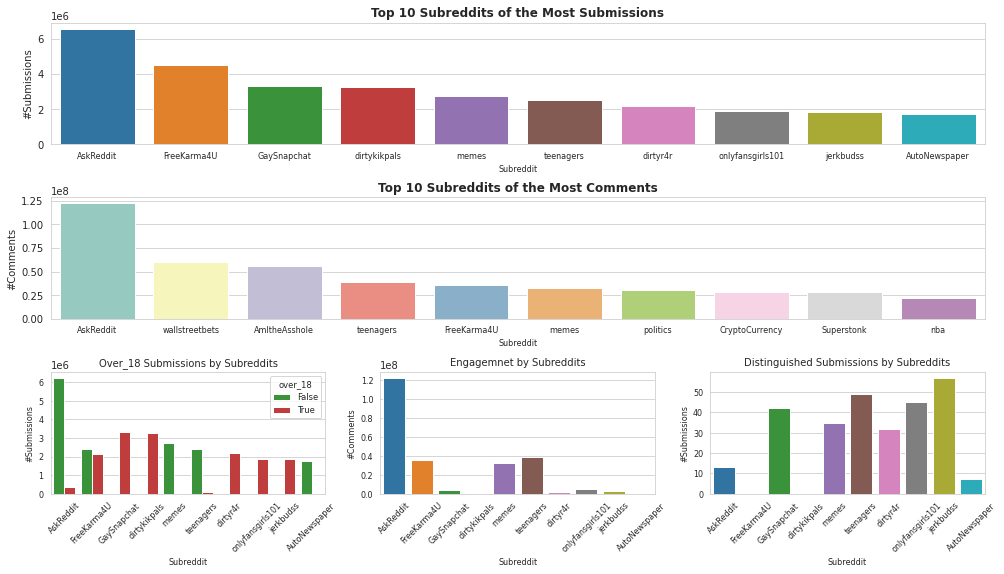

In [0]:
#fig = plt.Figure(figsize=(25,12))
plt.rcParams['figure.figsize'] = [14, 8]
ax1 = plt.subplot(311)
sns.barplot(ax=ax1, data=top_n_subreddits, x='subreddit', y='count')
ax1.set_title('Top 10 Subreddits of the Most Submissions', fontweight='bold')
ax1.set_xlabel('Subreddit', fontsize=8)
ax1.set_ylabel('#Submissions', fontsize=10)
ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=8)

ax2 = plt.subplot(312)
sns.barplot(ax=ax2, data=top_n_subrdt_comm, x='subreddit', y='num_comments', palette='Set3')
ax2.set_title('Top 10 Subreddits of the Most Comments', fontweight='bold')
ax2.set_xlabel('Subreddit', fontsize=8)
ax2.set_ylabel('#Comments', fontsize=10)
ax2.set_xticklabels(ax2.get_xticklabels(), fontsize=8)

ax3 = plt.subplot(337)
sns.barplot(ax=ax3, data=top_n_subreddit_over18, x='subreddit',y='count',hue='over_18', 
            palette=['tab:green','tab:red'], order=top_n_subreddits.subreddit.tolist())
ax3.set_title('Over_18 Submissions by Subreddits', fontsize=10)
ax3.set_xlabel('Subreddit', fontsize=8)
ax3.set_ylabel('#Submissions', fontsize=8)
ax3.set_xticklabels(ax3.get_xticklabels(), fontsize=8, rotation=45)
ax3.yaxis.set_tick_params(labelsize=8)
ax3.legend(title='over_18',title_fontsize='small',fontsize='small', loc='upper right')

ax4 = plt.subplot(338)
sns.barplot(ax=ax4, data=top_n_subreddit_comm, x='subreddit',y='num_comments',order=top_n_subreddits.subreddit.tolist())
ax4.set_title('Engagemnet by Subreddits', fontsize=10)
ax4.set_xlabel('Subreddit', fontsize=8)
ax4.set_ylabel('#Comments', fontsize=8)
ax4.set_xticklabels(ax4.get_xticklabels(), fontsize=8, rotation=45)
ax4.yaxis.set_tick_params(labelsize=8)

ax5 = plt.subplot(339)
sns.barplot(ax=ax5, data=top_n_subreddit_dist[top_n_subreddit_dist.distinguish_dummy==True], x='subreddit',y='count',order=top_n_subreddits.subreddit.tolist())
ax5.set_xlabel('Subreddit', fontsize=8)
ax5.set_ylabel('#Submissions', fontsize=8)
ax5.set_title('Distinguished Submissions by Subreddits', fontsize=10)
ax5.set_xticklabels(ax5.get_xticklabels(), fontsize=8, rotation=45)
ax5.yaxis.set_tick_params(labelsize=8)

plt.tight_layout(pad=0.8)
plt.savefig(os.path.join(PLOT_DIR, f'top_{top_n}_subreddits_by_submissions.png'))
plt.show()

### Where do the heated discussions of investments happen, i.e. particular subreddits?

In [0]:
# subset data to posts regarding the 4 meme stocks
# filter by subreddit
fin_subrdt = ['GME','amcstock','CryptoCurrency','Bitcoin','ethereum','StockMarket','wallstreetbets','investing']

# submissions
stock_sub = submissions.filter(col('subreddit').isin(fin_subrdt))

# comments
stock_comm = comments.filter(col('subreddit').isin(fin_subrdt))

In [0]:
subrdt_sum = stock_sub.groupBy('subreddit').agg(
    count("*").alias("total_submissions"),
    sum('num_comments').alias('total_comments'),
    avg('score').alias('avg_score'),
    count('distinguished').alias('distinguished_posts')
).orderBy('total_submissions', ascending=False).toPandas()
subrdt_sum

,subreddit,total_submissions,total_comments,avg_score,distinguished_posts
0,wallstreetbets,1585804,60240209,187.318343,112
1,CryptoCurrency,885844,28971559,46.594926,271
2,amcstock,541932,11970171,132.545209,65
3,GME,334043,9151190,250.066991,431
4,Bitcoin,221329,3989850,48.529646,767
5,investing,84975,1264890,28.720082,10
6,ethereum,76603,858973,30.845685,11
7,StockMarket,72805,694905,48.332216,7


In [0]:
# save table to repo folder
subrdt_sum.to_csv(os.path.join(CSV_DIR, "top_invest_subreddits.csv"), index=False)

### Among the 4 meme stocks, which one is the most popular stock? Which subreddits are they ususally discussed in?

In [0]:
# dummies for each meme stock
meme_stock = stock_sub.withColumn('gme', col('selftext').rlike('(?i)gme|(?i)gamestop')|(col('subreddit')=='GME'))
meme_stock = meme_stock.withColumn('amc', col('selftext').rlike('(?i)amc|(?i)american multi-cinema|(?i)american multicinema')|(col('subreddit')=='amcstock'))
meme_stock = meme_stock.withColumn('btc', col('selftext').rlike('(?i)btc|(?i)bitcoin')|(col('subreddit')=='Bitcoin'))
meme_stock = meme_stock.withColumn('eth', col('selftext').rlike('(?i)eth|(?i)ethereum')|(col('subreddit')=='ethereum'))

In [0]:
meme_stock = meme_stock.withColumn('stock', when(col('gme')==True, 'GME')
                                   .when(col('amc')==True, 'AMC')
                                   .when(col('btc')==True, 'BTC')
                                   .when(col('eth')==True, 'ETH')
                                   .otherwise('other')
                                  )

In [0]:
meme_stock_counts = meme_stock.filter(col('stock')!='other').groupBy('stock').agg(count('*').alias('total_submissions'),
                                                                                  sum('num_comments').alias('total_comments'),
                                                                                  avg('score').alias('avg_score'),
                                                                                  count('distinguished').alias('distinguished_submissions')
                                                                                 ).orderBy('total_submissions', ascending=False).toPandas()
meme_stock_counts

,stock,total_submissions,total_comments,avg_score,distinguished_submissions
0,AMC,536372,11681906,126.280126,65
1,GME,361121,22169987,468.274659,461
2,BTC,263791,8740823,88.182573,790
3,ETH,114726,10645700,146.722408,98


In [0]:
# save table to repo
meme_stock_counts.to_csv(os.path.join(CSV_DIR, "meme_stock_summary.csv"),index=False)

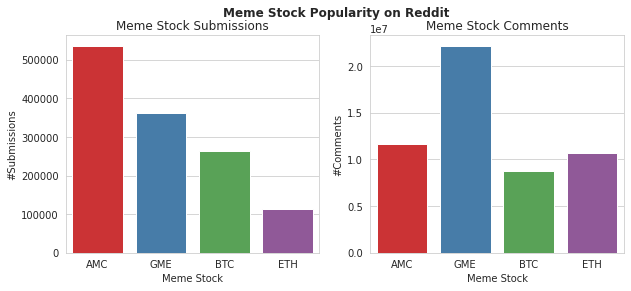

In [0]:
fig, ax = plt.subplots(1,2,figsize=(10,4))
sns.barplot(ax=ax[0], data=meme_stock_counts, x='stock', y='total_submissions', palette='Set1')
sns.barplot(ax=ax[1], data=meme_stock_counts, x='stock', y='total_comments', palette='Set1')

ax[0].set_title('Meme Stock Submissions')
ax[1].set_title('Meme Stock Comments')
ax[0].set_ylabel('#Submissions')
ax[1].set_ylabel('#Comments')
ax[0].set_xlabel('Meme Stock')
ax[1].set_xlabel('Meme Stock')
fig.suptitle('Meme Stock Popularity on Reddit', fontweight='bold')

plt.savefig(os.path.join(PLOT_DIR, f'meme_stock_popularity.png'))
plt.show()

In [0]:
stock_subrdt_counts = meme_stock.filter(col('stock')!='other').groupBy('stock','subreddit').agg(
    count("*").alias("total_submissions"),
    sum('num_comments').alias('total_comments'))

from pyspark.sql.window import Window

# top 3 reddits with most discussions
windowDept = Window.partitionBy("stock").orderBy(col("total_submissions").desc())
stock_subrdt_counts = stock_subrdt_counts.withColumn("row",
                                                     row_number().over(windowDept)).filter(col("row")<=3).drop("row").orderBy(
    ['stock','total_submissions'], ascending=[True,False]).toPandas()

In [0]:
stock_subrdt_counts

,stock,subreddit,total_submissions,total_comments
0,AMC,amcstock,534233,11443804
1,AMC,wallstreetbets,1550,153158
2,AMC,CryptoCurrency,346,79434
3,BTC,Bitcoin,221024,3956483
4,BTC,CryptoCurrency,41209,4617725
5,BTC,ethereum,890,71913
6,ETH,ethereum,75628,776291
7,ETH,CryptoCurrency,30570,8132435
8,ETH,wallstreetbets,5466,1587622
9,GME,GME,334043,9151190


In [0]:
stock_subrdt_counts.to_csv(os.path.join(CSV_DIR, "top3_subreddits_by_stock.csv"),index=False)

### Does popularity change over time? Does a certain stock gain increasing attention at a specific time period?

In [0]:
meme_stock = meme_stock.withColumn('date', to_date(col('created_utc').cast('timestamp'),"yyyy-MM-dd HH:mm:ss"))
daily_counts = meme_stock.filter(col('stock')!='other').groupBy('stock','date').agg(count('*').alias('total_submissions'),
                                                     sum('num_comments').alias('total_comments')).orderBy('date').toPandas()
daily_counts

,stock,date,total_submissions,total_comments
0,ETH,2021-01-01,79,1658
1,BTC,2021-01-01,481,7168
2,GME,2021-01-01,17,6445
3,ETH,2021-01-02,111,1848
4,BTC,2021-01-02,1056,14427
...,...,...,...,...
2415,ETH,2022-08-30,137,6550
2416,AMC,2022-08-31,415,9300
2417,BTC,2022-08-31,187,4279
2418,ETH,2022-08-31,121,8914


In [0]:
daily_counts.to_csv(os.path.join(CSV_DIR, "meme_stock_daily_counts.csv"),index=False)

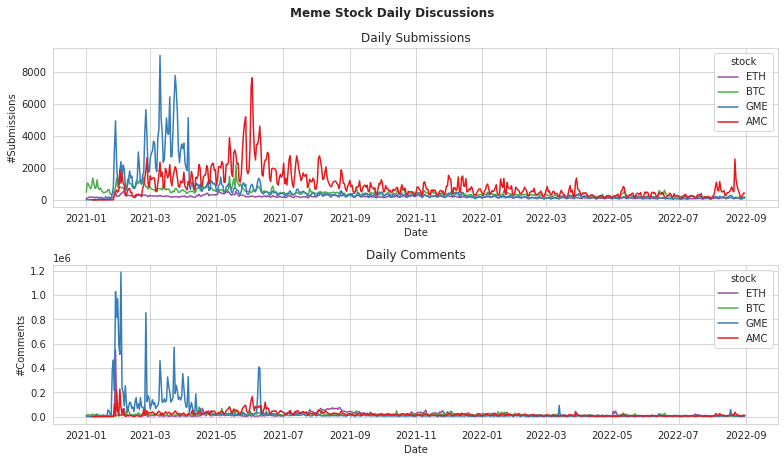

In [0]:
palette_tmp = ['#984ea3','#4caf4b','#377eb8','#e51a1e']
fig, ax = plt.subplots(2,1,figsize=(11,6.5))
sns.lineplot(ax=ax[0], data=daily_counts, x='date', y='total_submissions', hue='stock', palette=palette_tmp)
sns.lineplot(ax=ax[1], data=daily_counts, x='date', y='total_comments', hue='stock', palette=palette_tmp)

ax[0].set_title('Daily Submissions')
ax[1].set_title('Daily Comments')
ax[0].set_ylabel('#Submissions')
ax[1].set_ylabel('#Comments')
ax[0].set_xlabel('Date')
ax[1].set_xlabel('Date')
fig.suptitle('Meme Stock Daily Discussions', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.savefig(os.path.join(PLOT_DIR, f'meme_stock_popularity_daily.png'))
plt.show()

### What are the commonly used words associated with each meme stock?

In [0]:
stock_sub.select('selftext')

Out[98]: DataFrame[selftext: string]

In [0]:
# clean selftext
meme_stocks_sub_clean = meme_stock.filter((col('selftext') != '') & 
                               (col('selftext') != '[deleted]') & 
                               (col('selftext') != '[removed]') & 
                               (col('selftext') != ' ') & 
                               (col('selftext') != '.')).select('stock','selftext','score').orderBy('score', ascending=False)

In [0]:
gme_sub = meme_stocks_sub_clean.filter(col('stock')=='GME').select('selftext').limit(1000).toPandas()
amc_sub = meme_stocks_sub_clean.filter(col('stock')=='AMC').select('selftext').limit(1000).toPandas()
btc_sub = meme_stocks_sub_clean.filter(col('stock')=='BTC').select('selftext').limit(1000).toPandas()
eth_sub = meme_stocks_sub_clean.filter(col('stock')=='ETH').select('selftext').limit(1000).toPandas()

In [0]:
#! pip install nltk

     |████████████████████████████████| 1.5 MB 11.1 MB/s 
     |████████████████████████████████| 78 kB 1.3 MB/s 
     |████████████████████████████████| 769 kB 89.6 MB/s 
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-c59ced9a-9d59-4515-bd6a-51fe9d4ebb94/bin/python -m pip install --upgrade pip' command.


In [0]:
# clean text and tokenize
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
nltk.download('stopwords')

def tokenizer(text):
    # initialize tokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text.lower())
    # remove stop words
    tokens = [token for token in tokens if (token not in stopwords.words('english')) and token.isalpha()]
    return ' '.join(tokens)
  
gme_sub['text_clean'] = gme_sub.selftext.map(tokenizer)
amc_sub['text_clean'] = amc_sub.selftext.map(tokenizer)
btc_sub['text_clean'] = btc_sub.selftext.map(tokenizer)
eth_sub['text_clean'] = eth_sub.selftext.map(tokenizer)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


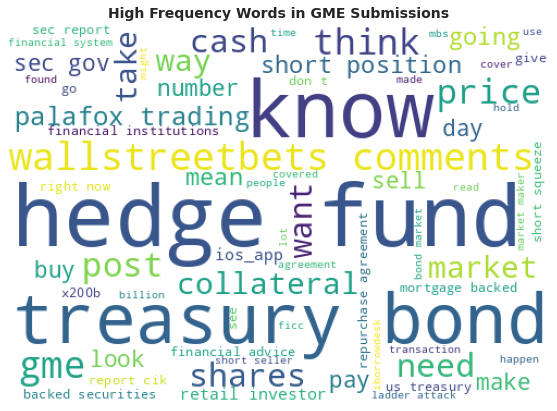

In [0]:
# GME
from wordcloud import WordCloud, STOPWORDS
stopwords = list(set(STOPWORDS))
cust_words = ['amp','https','reddit','_','utm_medium','utm_name','utm_source','repo',
              'png','jpg','pjpg','preview','width','format','webp','redd','auto','share']

gme_words = ' '.join([t.lower() for t in gme_sub.selftext])
gme_wc = WordCloud(width = 500, height = 350,
                   background_color ='white',
                   stopwords = stopwords+cust_words,
                   min_font_size = 10).generate(gme_words)

plt.figure(figsize=(12,7))
plt.imshow(gme_wc)
plt.axis("off")
plt.title('High Frequency Words in GME Submissions', fontweight='bold', fontsize='14')
plt.savefig(os.path.join(PLOT_DIR, f'gme_wordcloud.png'))
plt.show()

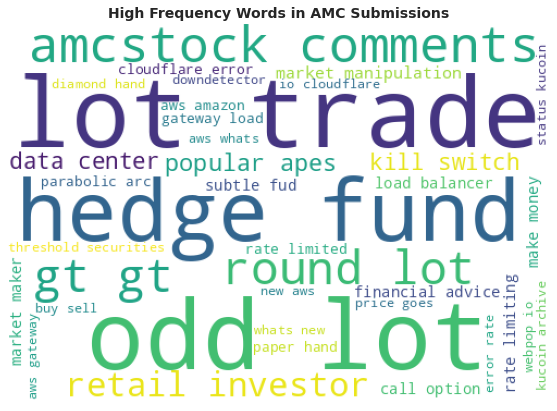

In [0]:
# AMC
amc_words = ' '.join(amc_sub.text_clean)
amc_wc = WordCloud(width = 500, height = 350,
                   background_color ='white',
                   stopwords = stopwords+cust_words,
                   min_font_size = 10).generate(amc_words)

plt.figure(figsize=(12,7))
plt.imshow(amc_wc)
plt.axis("off")
plt.title('High Frequency Words in AMC Submissions', fontweight='bold', fontsize='14')
plt.savefig(os.path.join(PLOT_DIR, f'amc_wordcloud.png'))
plt.show()

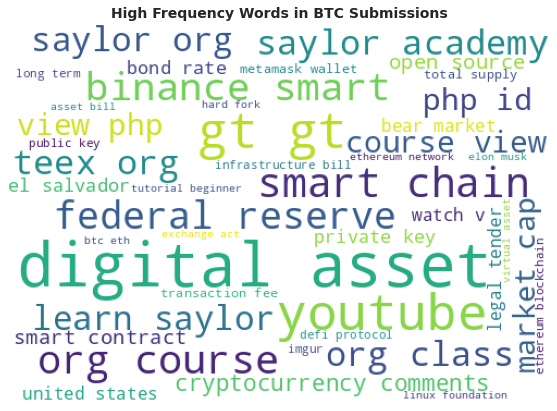

In [0]:
# BTC
btc_words = ' '.join(btc_sub.text_clean)
btc_wc = WordCloud(width = 500, height = 350,
                   background_color ='white',
                   stopwords = stopwords+cust_words,
                   min_font_size = 10).generate(btc_words)

plt.figure(figsize=(12,7))
plt.imshow(btc_wc)
plt.axis("off")
plt.title('High Frequency Words in BTC Submissions', fontweight='bold', fontsize='14')
plt.savefig(os.path.join(PLOT_DIR, f'btc_wordcloud.png'))
plt.show()

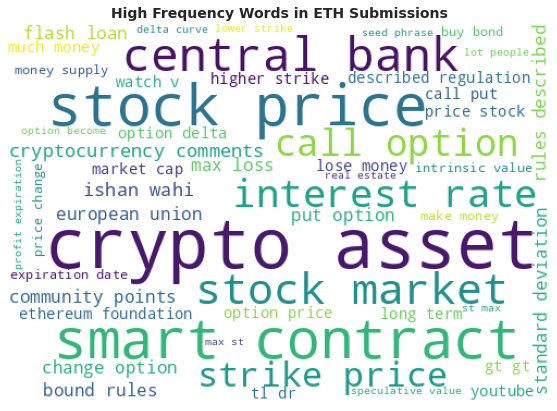

In [0]:
# ETH
eth_words = ' '.join(eth_sub.text_clean)
eth_wc = WordCloud(width = 500, height = 350,
                   background_color ='white',
                   stopwords = stopwords+cust_words,
                   min_font_size = 10).generate(eth_words)

plt.figure(figsize=(12,7))
plt.imshow(eth_wc)
plt.axis("off")
plt.title('High Frequency Words in ETH Submissions', fontweight='bold', fontsize='14')
plt.savefig(os.path.join(PLOT_DIR, f'eth_wordcloud.png'))
plt.show()

In [0]:
# write to parquet
meme_stock.write.format('parquet').save("/FileStore/meme_stock_sub")
meme_stock.filter((col('selftext') != '') & (col('selftext') != '[deleted]') & 
                  (col('selftext') != '[removed]') & (col('selftext') != ' ') & 
                  (col('selftext') != '.')).write.format('parquet').save("/FileStore/meme_stock_sub_clean")

### External data analysis: stock returns over time.

In [0]:
gme = pd.read_csv('data/csv/GME.csv')
amc = pd.read_csv('data/csv/AMC.csv')
btc = pd.read_csv('data/csv/BTC-USD.csv')
eth = pd.read_csv('data/csv/ETH-USD.csv')

In [0]:
gme['Date'] = pd.to_datetime(gme.Date)
amc['Date'] = pd.to_datetime(amc.Date)
btc['Date'] = pd.to_datetime(btc.Date)
eth['Date'] = pd.to_datetime(eth.Date)

# stock return
gme['Return'] = gme.Close/gme.Open-1
amc['Return'] = amc.Close/amc.Open-1
btc['Return'] = btc.Close/btc.Open-1
eth['Return'] = eth.Close/eth.Open-1

In [0]:
# 3 day rolling average
span = 3
gme['rolling'] = gme.rolling(span, min_periods=1, center=True).mean().Return
amc['rolling'] = amc.rolling(span, min_periods=1, center=True).mean().Return
btc['rolling'] = btc.rolling(span, min_periods=1, center=True).mean().Return
eth['rolling'] = eth.rolling(span, min_periods=1, center=True).mean().Return

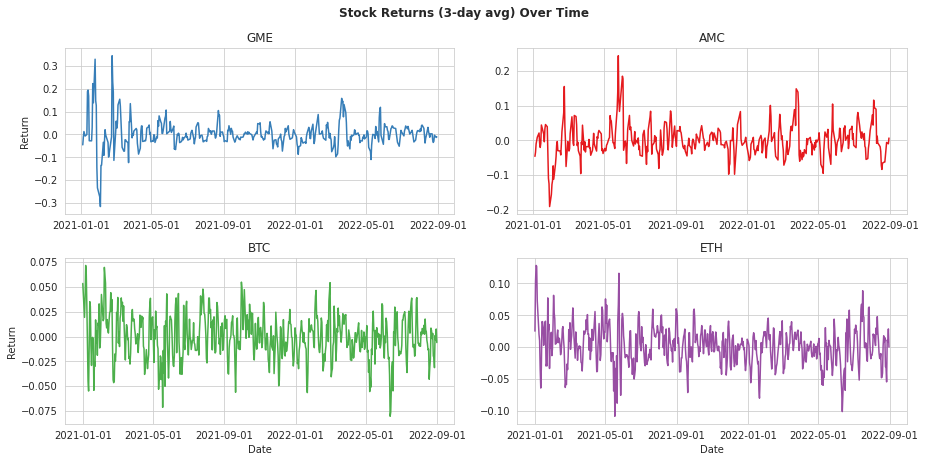

In [0]:
fig, ax = plt.subplots(2,2,figsize=(13,6.5))
fig.suptitle('Stock Returns (3-day avg) Over Time', fontweight='bold', fontsize=12)
ax[0,0].plot(gme.Date, gme['rolling'], c=palette_tmp[2])
ax[0,1].plot(amc.Date, amc['rolling'], c=palette_tmp[3])
ax[1,0].plot(btc.Date, btc['rolling'], c=palette_tmp[1])
ax[1,1].plot(eth.Date, eth['rolling'], c=palette_tmp[0])

ax[0,0].set_xticks(ax[0,0].get_xticks()[::2])
ax[0,1].set_xticks(ax[0,1].get_xticks()[::2])
ax[1,0].set_xticks(ax[1,0].get_xticks()[::2])
ax[1,1].set_xticks(ax[1,1].get_xticks()[::2])

ax[1,0].set_xlabel('Date')
ax[1,1].set_xlabel('Date')

ax[0,0].set_ylabel('Return')
ax[1,0].set_ylabel('Return')

ax[0,0].set_title('GME')
ax[0,1].set_title('AMC')
ax[1,0].set_title('BTC')
ax[1,1].set_title('ETH')

plt.tight_layout()
plt.savefig(os.path.join(PLOT_DIR, f'meme_stock_return.png'))
plt.show()